In [67]:
from census import Census
import gmaps
import numpy as np
import pandas as pd
import requests
import time
from scipy.stats import stats
from matplotlib import pyplot as plt 
from scipy.stats import linregress
from sklearn import datasets

In [94]:
#States import
df1 = pd.read_csv('csvData.csv')
State1 = pd.DataFrame(df1) 
State1 = State1.drop([8])
State1.head()

,State,Abbrev,Code
0,Alabama,Ala.,AL
1,Alaska,Alaska,AK
2,Arizona,Ariz.,AZ
3,Arkansas,Ark.,AR
4,California,Calif.,CA


In [69]:
#Corona data import 
df = pd.read_csv('united_states_covid19_cases_and_deaths_by_state.csv')
coronadata = pd.DataFrame(df)
coronadata = coronadata.drop(columns=['Confirmed Cases', 'Probable Cases','Cases in Last 7 Days','Case Rate per 100000','Confirmed Deaths', 'Probable Deaths','Deaths in Last 7 Days','Case Rate per 100000 in Last 7 Days']) 

In [70]:
#coronadata = coronadata.drop([3,8,11,13,28,34,44,45,47,54,60]) 
coronadata = coronadata.rename(columns={"State/Territory":"State"})   

coronadata

,State,Total Cases,Total Deaths,Death Rate per 100000,Death Rate per 100K in Last 7 Days
0,Alaska,51693,257,35,0.6
1,Alabama,443009,6662,135,1.6
2,Arkansas,284702,4650,154,1.5
3,American Samoa,3,0,0,0.0
4,Arizona,727895,12239,168,1.9
...,...,...,...,...,...
56,Washington,302141,4148,54,0.5
57,Wisconsin,582477,6199,106,0.7
58,West Virginia,115839,1899,105,0.9
59,Wyoming,51022,571,98,1.2


In [71]:
Coronastate = pd.merge(coronadata,State1,how="left",on=['State','State'])
Coronastate = Coronastate.drop(columns = {'Total Deaths','Death Rate per 100000',"Death Rate per 100K in Last 7 Days"}) 
Coronastate.head()

,State,Total Cases,Abbrev,Code
0,Alaska,51693,Alaska,AK
1,Alabama,443009,Ala.,AL
2,Arkansas,284702,Ark.,AR
3,American Samoa,3,NaN,NaN
4,Arizona,727895,Ariz.,AZ


In [72]:
#Obestity import 
df = pd.read_csv('National_Obesity_By_State.csv')
Obesity = pd.DataFrame(df) 
Obesity = Obesity.rename(columns={"NAME":"State"}) 
Obesity.head() 

,FID,State,Obesity,SHAPE_Length,SHAPE_Area
0,1,Texas,32.4,1.540832e+07,7.672329e+12
1,2,California,24.2,1.451870e+07,5.327809e+12
2,3,Kentucky,34.6,6.346699e+06,1.128830e+12
3,4,Georgia,30.7,5.795596e+06,1.652980e+12
4,5,Wisconsin,30.7,6.806782e+06,1.567816e+12


In [73]:
df1 = pd.read_csv('csvData.csv')
State = pd.DataFrame(df1) 
State.head()

,State,Abbrev,Code
0,Alabama,Ala.,AL
1,Alaska,Alaska,AK
2,Arizona,Ariz.,AZ
3,Arkansas,Ark.,AR
4,California,Calif.,CA


In [74]:
ObseityFrame = pd.merge(
    Obesity, State, how="left", on=["State", "State"])

In [75]:
ObseityFrame.rename(columns={"Code": "State","State":"Name","Obesity":"Obesity (BMI)"}) 
ObseityFrame.head()

,FID,State,Obesity,SHAPE_Length,SHAPE_Area,Abbrev,Code
0,1,Texas,32.4,1.540832e+07,7.672329e+12,Tex.,TX
1,2,California,24.2,1.451870e+07,5.327809e+12,Calif.,CA
2,3,Kentucky,34.6,6.346699e+06,1.128830e+12,Ky.,KY
3,4,Georgia,30.7,5.795596e+06,1.652980e+12,Ga.,GA
4,5,Wisconsin,30.7,6.806782e+06,1.567816e+12,Wis.,WI


In [76]:
FinalFrame = pd.merge(
    ObseityFrame, Coronastate, how="left", on=["State", "State"]) 
ObseityFrame.head()

,FID,State,Obesity,SHAPE_Length,SHAPE_Area,Abbrev,Code
0,1,Texas,32.4,1.540832e+07,7.672329e+12,Tex.,TX
1,2,California,24.2,1.451870e+07,5.327809e+12,Calif.,CA
2,3,Kentucky,34.6,6.346699e+06,1.128830e+12,Ky.,KY
3,4,Georgia,30.7,5.795596e+06,1.652980e+12,Ga.,GA
4,5,Wisconsin,30.7,6.806782e+06,1.567816e+12,Wis.,WI


In [77]:
ObesityFrame = ObseityFrame.drop(columns=['SHAPE_Length', 'SHAPE_Area','Abbrev','FID']) 
ObesityFrame = ObesityFrame.drop(38)    
ObesityFrame.head()

,State,Obesity,Code
0,Texas,32.4,TX
1,California,24.2,CA
2,Kentucky,34.6,KY
3,Georgia,30.7,GA
4,Wisconsin,30.7,WI


In [78]:
ObesityFrame= ObesityFrame.rename(columns={"Code": "State","Obesity":"Obesity (BMI)"}) 
ObesityFrame = ObesityFrame.drop([35])

In [79]:
ObesityFrame.head()

,State,Obesity (BMI),State
0,Texas,32.4,TX
1,California,24.2,CA
2,Kentucky,34.6,KY
3,Georgia,30.7,GA
4,Wisconsin,30.7,WI


In [108]:
FinalFrame = pd.merge(
    ObseityFrame, Coronastate, how="left", on=["State", "State"]) 
FinalFrame = FinalFrame.drop(columns=['SHAPE_Length', 'SHAPE_Area','Abbrev_x','Code_x','Code_y','FID']) 
FinalFrame = FinalFrame.drop([51,35,38]) 
FinalFrame

,State,Obesity,Total Cases,Abbrev_y
0,Texas,32.4,2246845,Tex.
1,California,24.2,3136158,Calif.
2,Kentucky,34.6,347836,Ky.
3,Georgia,30.7,870828,Ga.
4,Wisconsin,30.7,582477,Wis.
5,Oregon,30.1,138587,Ore.
6,Virginia,29.2,483326,Va.
7,Tennessee,33.8,710427,Tenn.
8,Louisiana,36.2,385942,La.
9,New York,25.0,772569,N.Y.


In [113]:
y_values = FinalFrame['Total Cases']
x_values = FinalFrame['Obesity'] 
state = FinalFrame['Abbrev_y'].tolist()
line_eq

'y = -11693.55x + 842184.37'

The r-squared is: 0.006154583499523735


KeyError: 35

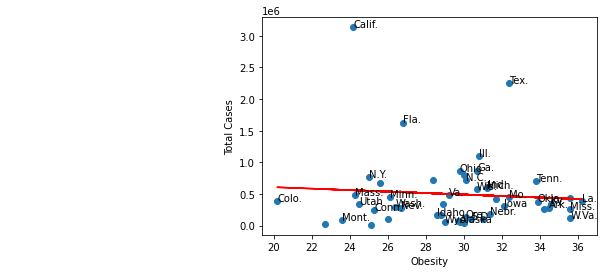

In [112]:
# Histogram Plot of Data
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Obesity')
plt.ylabel('Total Cases')
print(f"The r-squared is: {rvalue**2}")

n = state


for i, txt in enumerate(n):
    plt.annotate(txt, (x_values[i], y_values[i]))

plt.show() 
plt.draw()
plt.savefig("Regression Analysis")

In [83]:
stats.ttest_ind(x_values, y_values, equal_var=False)

Ttest_indResult(statistic=-6.175268337126128, pvalue=1.3528624574923802e-07)

In [84]:
FinalFrame = FinalFrame.set_index("State")

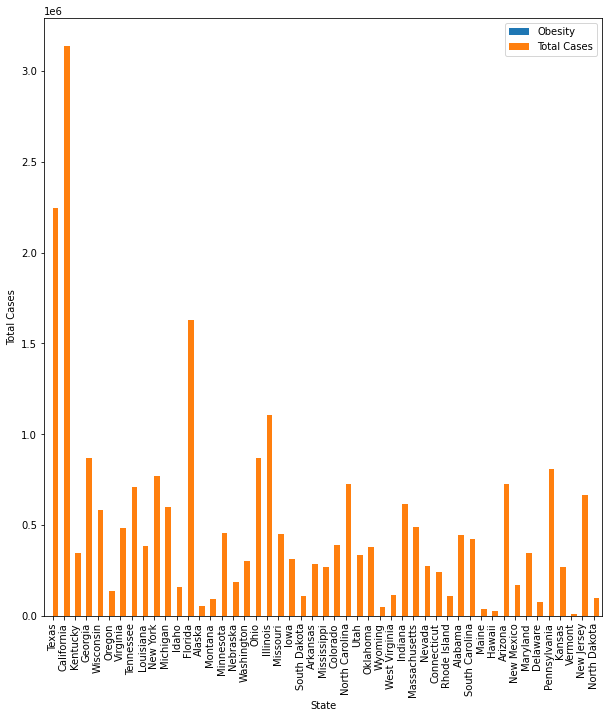

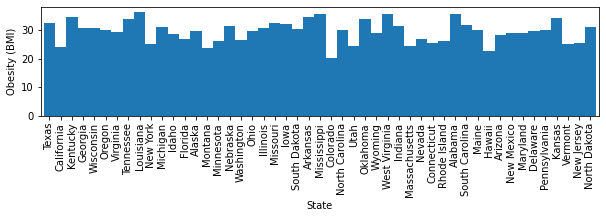

<Figure size 432x288 with 0 Axes>

In [86]:
count_chart = FinalFrame.plot(kind='bar', figsize=(10, 11),width=1)

# Set the xlabel and ylabel using class methods
count_chart.set_xlabel("State")
count_chart.set_ylabel("Total Cases")


plt.show()
plt.tight_layout() 
plt.savefig("Covid")

count_chart = FinalFrame['Obesity'].plot(kind='bar', figsize=(10, 2),width=1)

# Set the xlabel and ylabel using class methods
count_chart.set_xlabel("State")
count_chart.set_ylabel("Obesity (BMI)")


plt.show()
plt.tight_layout() 
plt.draw()
plt.savefig("Obesity")